<a href="https://colab.research.google.com/github/kAi3345/Astron/blob/main/exoplanet/Exoplanet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [147]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.ascii
from google.colab import files
uploaded = files.upload()

Saving GJ 436.txt to GJ 436 (2).txt


In [148]:
dat = astropy.io.ascii.read("GJ 436.txt")

Text(0, 0.5, 'Normalize Flux')

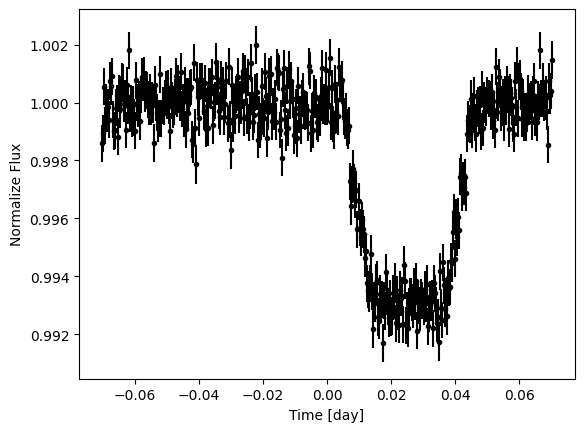

In [149]:
time = dat["col1"] - np.median(dat["col1"])
flux = dat["col2"]
err = dat["col3"]
plt.errorbar(time, flux, yerr=err, marker=".", color="black", linestyle="none")
plt.xlabel("Time [day]")
plt.ylabel("Normalize Flux")

In [150]:
# define a function that create a box model
def box_model(t, center_time, transitTime, depth, fluxChange):
  f = np.zeros(np.shape(t))                            # create a empty array of time to make sure number of output equal to input
  ind = np.where(np.abs(t - center_time) < (transitTime / 2.0))        # window of in transit data that have distance to center less than half of the duration
  f[ind] = 1.0 + fluxChange - depth                                   # in transit value equal to the base value minus the depth
  ind = np.where(np.abs(t - center_time) >= (transitTime / 2.0))       # window of out of transit data that have distance to center more than half of duration
  f[ind] = 1.0 + fluxChange                                            # out of transit value
  return(f)                   # return the model

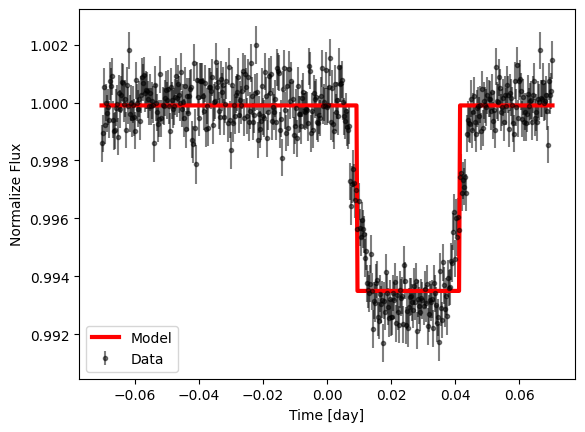

In [151]:
center_time, duration, depth, delta_flux = 0.0254, 0.032, 0.0064, -0.0001          # set these values to produce the roughly best fit model according to graph
model = box_model(time, center_time, duration, depth, delta_flux)                   # produce the box model using the function defined previously
plt.errorbar(time, flux, yerr=err, marker=".", color="black", linestyle="none", alpha=0.5, label="Data")     # plot the data
plt.plot(time, model, color="red", linewidth=3.0, label="Model")                # plot the model
plt.xlabel("Time [day]")
plt.ylabel("Normalize Flux")
plt.legend();

In [152]:
#calculate the reduced chi-square to check how fit the model to the data
def calc_reduced_chi2(O, C, err, n, m):
  Chi2 = np.sum((O - C) ** 2 / err**2)                  # O is observation data, C is expected data, err is the variance
  reduced_Chi2 = Chi2 / (n - m)                         # use chi square data divide degree of freedom to calcutate reduced chi square
  return reduced_Chi2

box_model_chi2 = calc_reduced_chi2(flux,model,err,len(time),4)              #calculate the chi square of the box model to test how fit the model is
print(box_model_chi2)

2.125914296316


In [153]:
def trapezoid_model(t, center_time, duration, depth, delta_flux, ingress):
  f = np.zeros(np.shape(t))
  ind = np.where(np.abs(t - center_time) < (duration / 2.0))
  f[ind] = 1.0 + delta_flux - depth
  ind = np.where(np.abs(t - center_time) >= (duration / 2.0 + ingress))
  f[ind] = 1.0 + delta_flux
  ind = np.where((np.abs(t - center_time) <= (duration / 2.0 + ingress)) & (np.abs(t - center_time) > (duration / 2.0)))
  for i in ind[0]:
    delta_t = np.abs(np.abs(t[i] - center_time) - (duration / 2.0))
    f[i] = depth / ingress * delta_t + 1.0 + delta_flux - depth
  return(f)

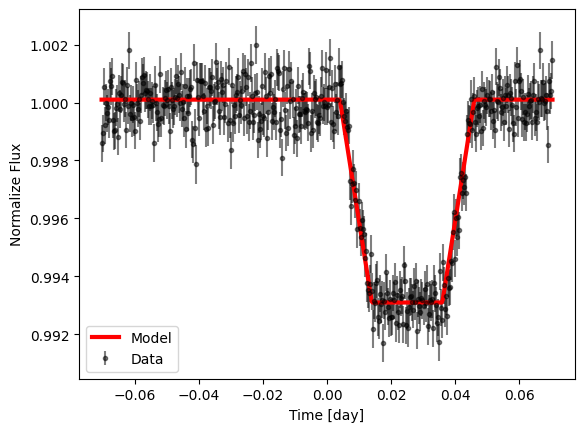

In [207]:
center_time, duration, depth, delta_flux, ingress =  0.025, 0.022, 0.007, 0.0001, 0.01
model = trapezoid_model(time, center_time, duration, depth, delta_flux, ingress)
plt.errorbar(time, flux, yerr=err, marker=".", color="black", linestyle="none", alpha=0.5, label="Data")
plt.plot(time, model, color="red", linewidth=3.0, label="Model")
plt.xlabel("Time [day]")
plt.ylabel("Normalize Flux")
plt.legend();

In [208]:
def calc_reduced_chi2(O, C, err, n, m):
  Chi2 = np.sum((O - C) ** 2 / err**2)                  # O is observation data, C is expected data, err is the variance
  reduced_Chi2 = Chi2 / (n - m)                         # use chi square data divide degree of freedom to calcutate reduced chi square
  return reduced_Chi2

trapezoid_model_chi2 = calc_reduced_chi2(flux,model,err,len(time),4)              #calculate the chi square of the box model to test how fit the model is
print(trapezoid_model_chi2)

1.1392405309730043
